### Test notebook

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML

from graphUtils import add_edges
from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer

In [2]:
#device = torch.device('cpu')
device = torch.device('mps')
visualizer = Visualizer()
n = 10
organism = generate_organism(n, device)
graph = organism.toGraph()

In [3]:
model = GNCA(device)
model = model.to(device)

In [4]:
graph, _, _ = model(graph,1)

/Users/martinholst/miniconda3/envs/AML/lib/python3.10/site-packages/torch_geometric/utils/loop.py:298: UserWarning: The operator 'aten::nonzero' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  loop_attr[edge_index[0][inv_mask]] = edge_attr[inv_mask]


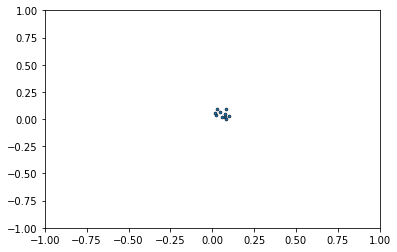

In [5]:
anim = visualizer.animate_organism(graph, model)
IPython.display.HTML(anim)

In [6]:
graph

Data(x=[10, 5], edge_index=[2, 110], device=mps)